# CSC 177  Yelp Review Dataset Final Project
# Dr. Haiquan Chen
### Ehsan Hosseinzadeh  Khaligh, Shah Newaz

#### Pre-processing

In [24]:
import pandas as pd 
import time

pd.set_option('display.max_columns', None)  

In [25]:
column_names = ['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool','']
df = pd.read_table("dataset/xab.txt", sep=",\"" ,header=None, names=column_names, encoding='ISO-8859-1', dtype='str', engine='python')
df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,
0,they had left their whipping towel in my trunk...,"useful"":0","funny"":0","cool"":0}",None,None,None,None,None,None
1,"{""review_id"":""gJtYPlDGfkBOGyZTeV71ug""","user_id"":""T2gJvqmX2wbeam-CUw-fvg""","business_id"":""fQt4D34vcJNtEf8Q4zte3w""","stars"":1","date"":""2016-03-01""","text"":""DISAPPOINTED - I have no clue why every...","useful"":0","funny"":0","cool"":0}",None
2,"{""review_id"":""VbbXwdwY41kd-uBNy6_3Xg""","user_id"":""T2gJvqmX2wbeam-CUw-fvg""","business_id"":""e0JOkQYz_cnz91k6X55PLw""","stars"":5","date"":""2016-03-01""","text"":""In line with the first class experience...","useful"":0","funny"":0","cool"":0}",None
3,"{""review_id"":""AezK5-RvRp-VGGnrI3Om-A""","user_id"":""-EArvT0PKftzn4QYVqJKfg""","business_id"":""Gaq3S9lmjXVcuDCZ8ulppw""","stars"":5","date"":""2017-08-26""","text"":""We at the all you can eat AYCE and it w...","useful"":0","funny"":0","cool"":0}",None
4,"{""review_id"":""BPaWfPnL3e8mJQ0mJmcjkg""","user_id"":""JDu-gXhyLCHohpzoVWbmqA""","business_id"":""XEvOc1jhPosMn69hoqiYPQ""","stars"":3","date"":""2015-07-05""","text"":""Great salon but a bit pricy!!! I pay $8...","useful"":0","funny"":0","cool"":0}",None


In [26]:
filterd_df = df[["user_id","text"]]

In [27]:
filterd_df.head()

,user_id,text
0,"useful"":0",None
1,"user_id"":""T2gJvqmX2wbeam-CUw-fvg""","text"":""DISAPPOINTED - I have no clue why every..."
2,"user_id"":""T2gJvqmX2wbeam-CUw-fvg""","text"":""In line with the first class experience..."
3,"user_id"":""-EArvT0PKftzn4QYVqJKfg""","text"":""We at the all you can eat AYCE and it w..."
4,"user_id"":""JDu-gXhyLCHohpzoVWbmqA""","text"":""Great salon but a bit pricy!!! I pay $8..."


#### Clean Data

In [28]:
filterd_df["user_id"] = filterd_df["user_id"].apply((lambda string: string.replace("user_id\":\"", "")))
filterd_df["user_id"] = filterd_df["user_id"].apply((lambda string: string.replace("\"", "")))
filterd_df["text"] = filterd_df["text"].apply((lambda string: string.replace("text\":\"", "")))

/Users/Ehsan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Ehsan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Ehsan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [29]:
filterd_df.head()

,user_id,text
0,useful:0,None
1,T2gJvqmX2wbeam-CUw-fvg,DISAPPOINTED - I have no clue why everyone mak...
2,T2gJvqmX2wbeam-CUw-fvg,In line with the first class experience at Wyn...
3,-EArvT0PKftzn4QYVqJKfg,We at the all you can eat AYCE and it was awes...
4,JDu-gXhyLCHohpzoVWbmqA,Great salon but a bit pricy!!! I pay $8. In LA...


In [30]:
def splitTextStrings(string):
    strList = []
    for i in string.split():
            strList.append(i)
               
    return strList

In [31]:
filterd_df["text"] = filterd_df["text"].apply(splitTextStrings)

/Users/Ehsan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
filterd_df.shape

(1312221, 2)

In [33]:
gropedURD_df = filterd_df.groupby(['user_id']).sum()

In [34]:
gropedURD_df.shape

(328727, 1)

- Removing  special characters

In [35]:
def removeSpecialCharactors(list1):

    specialChar = ['~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/']
    tempList = []

    modString = ""
    flag = False
    
    for string in list1:
    
        for spChar in specialChar:
        
            if flag == True:
                string = modString 
                flag = False
        
            if spChar in string:
            
                modString = string.replace(spChar, "")
                flag = True 
    
        tempList.append(string)      
    
                 
    return tempList 

In [36]:
start_time = time.clock()
gropedURD_df["text"] = gropedURD_df["text"].apply(removeSpecialCharactors)
print (time.clock() - start_time, "(Run Time in S)")

326.057777 (Run Time in S)


In [37]:
gropedURD_df.head()

,text
user_id,
--2vR0DIsmQ6WfcSzKWigw,"[Unser, erster, Besichtigungspunkt, in, Las, V..."
--3B8LdT1NCD-bPkwS5-5g,"[Ive, been, coming, to, Randys, for, 10, years..."
--4ww39MLTS1SBRmCrSmww,"[Great, experience, Reggie, at, Mandalay, Bay,..."
--56mD0sm1eOogphi2FFLw,"[This, was, on, our, list, while, visiting, Ve..."
--66hzx80CeVZcrm4AKJtQ,"[A, bit, pricey, but, waffles, are, good, Chic..."


- Download stop words library 

In [ ]:
import nltk
nltk.download()

- Removing  stop words

In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = list(stopwords.words('english'))

In [39]:
def removeStopWords(list1):
    filtered_sentence = []
    
    for textString in list1:
        if not textString in stop_words:
                filtered_sentence.append(textString)
            
    return filtered_sentence

In [40]:
gropedURD_df["text"] = gropedURD_df["text"].apply(removeStopWords)

In [41]:
gropedURD_df.head()

,text
user_id,
--2vR0DIsmQ6WfcSzKWigw,"[Unser, erster, Besichtigungspunkt, Las, Vegas..."
--3B8LdT1NCD-bPkwS5-5g,"[Ive, coming, Randys, 10, years, plus, As, fem..."
--4ww39MLTS1SBRmCrSmww,"[Great, experience, Reggie, Mandalay, Bay, Avi..."
--56mD0sm1eOogphi2FFLw,"[This, list, visiting, Vegas, We, afraid, woul..."
--66hzx80CeVZcrm4AKJtQ,"[A, bit, pricey, waffles, good, Chicken, ok, I..."


#### A few data statistics

In [75]:
gropedURD_df["ListLen"] = gropedURD_df["text"].apply(lambda x: len(x))

Data size: (328727, 1)

- number of unique items

In [43]:
def numberUniqueItems(list1):
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)

    return len(unique_list)

In [44]:
start_time = time.clock()
gropedURD_df["numUniqueItems"] = gropedURD_df["text"].apply(numberUniqueItems)
print (time.clock() - start_time, "(Run Time in S)")

497.00551100000007 (Run Time in S)


In [45]:
gropedURD_df.head()

,text,ListLen,numUniqueItems
user_id,,,
--2vR0DIsmQ6WfcSzKWigw,"[Unser, erster, Besichtigungspunkt, Las, Vegas...",7810,2681
--3B8LdT1NCD-bPkwS5-5g,"[Ive, coming, Randys, 10, years, plus, As, fem...",169,143
--4ww39MLTS1SBRmCrSmww,"[Great, experience, Reggie, Mandalay, Bay, Avi...",26,25
--56mD0sm1eOogphi2FFLw,"[This, list, visiting, Vegas, We, afraid, woul...",252,180
--66hzx80CeVZcrm4AKJtQ,"[A, bit, pricey, waffles, good, Chicken, ok, I...",71,62


- histogram of row basket size 

In [46]:
import matplotlib.pyplot as plt
import numpy as np

listsSize = gropedURD_df.ListLen.tolist()

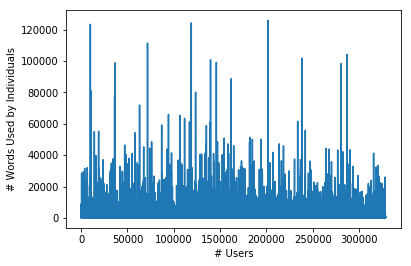

In [47]:
plt.plot(listsSize)
plt.xlabel('# Users')
plt.ylabel('# Words Used by Individuals')
plt.show()

- histogram of unique items for users.

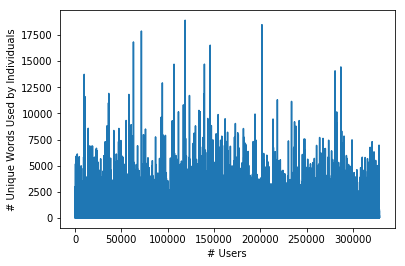

In [48]:
UniqueSizeList = gropedURD_df.numUniqueItems.tolist()
plt.plot(UniqueSizeList)
plt.xlabel('# Users')
plt.ylabel('# Unique Words Used by Individuals')
plt.show()

#### Vectorizing of data and Apriori algorithm 

- convert the text list back to string type 

In [49]:
def listToStr(list1):
    string = ""
    for x in list1:
        string += " " + x
        
    return string

In [50]:
gropedURD_df["textStr"] = gropedURD_df["text"].apply(listToStr)
gropedURD_df.head()

,text,ListLen,numUniqueItems,textStr
user_id,,,,
--2vR0DIsmQ6WfcSzKWigw,"[Unser, erster, Besichtigungspunkt, Las, Vegas...",7810,2681,Unser erster Besichtigungspunkt Las Vegas war...
--3B8LdT1NCD-bPkwS5-5g,"[Ive, coming, Randys, 10, years, plus, As, fem...",169,143,Ive coming Randys 10 years plus As female Its...
--4ww39MLTS1SBRmCrSmww,"[Great, experience, Reggie, Mandalay, Bay, Avi...",26,25,Great experience Reggie Mandalay Bay Avis gre...
--56mD0sm1eOogphi2FFLw,"[This, list, visiting, Vegas, We, afraid, woul...",252,180,This list visiting Vegas We afraid would craz...
--66hzx80CeVZcrm4AKJtQ,"[A, bit, pricey, waffles, good, Chicken, ok, I...",71,62,A bit pricey waffles good Chicken ok I like w...


In [51]:
gropedURD_df.shape

(328727, 4)

In [52]:
gropedURD_df.to_csv('CleanedYelpReviewXab.csv')

In [53]:
gropedURD_df[["textStr"]]

,textStr
user_id,
--2vR0DIsmQ6WfcSzKWigw,Unser erster Besichtigungspunkt Las Vegas war...
--3B8LdT1NCD-bPkwS5-5g,Ive coming Randys 10 years plus As female Its...
--4ww39MLTS1SBRmCrSmww,Great experience Reggie Mandalay Bay Avis gre...
--56mD0sm1eOogphi2FFLw,This list visiting Vegas We afraid would craz...
--66hzx80CeVZcrm4AKJtQ,A bit pricey waffles good Chicken ok I like w...
--6CV8BPNofy7jt1JavD-g,This 16th 10th ones still active ballpark I L...
--6D_IuxyKTN53pHi904ag,Best Orthontist town Warm family friendly pro...
--6kLBBsm0GPM9vIB2YBDw,This one best kept secrets city nI driving pl...
--6u02ZqjZRnwtX3t9bZtQ,The hotpot really awful Taste like nothing Fi...


- Run from Saved CVS clean Data set.

In [56]:
import sys
import csv
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

In [57]:
csv.field_size_limit(sys.maxsize)

columnNames = ['user_id','text', 'ListLen', 'numUniqueItems', 'textStr','']
new_df = pd.read_csv("dataset/CleanedYelpReviewXab.csv", header=None, names=columnNames, encoding='ISO-8859-1', dtype='str', engine='python')
new_df = new_df.drop(new_df.index[0])

In [58]:
filtered_new_df = new_df[new_df.ListLen.astype(float) <= 300]

In [59]:
filtered_new_df.shape

(278484, 6)

In [60]:
filtered_new_df = filtered_new_df[['user_id', 'textStr']]
filtered_new_df.shape

(278484, 2)

In [61]:
filtered_new_df = filtered_new_df.iloc[0:5000, 0:2] 
filtered_new_df.shape

(5000, 2)

In [62]:
import sklearn.feature_extraction.text as sk_text

start_time = time.clock()
textList = list(filtered_new_df.textStr)

vectorizer = sk_text.CountVectorizer(min_df=1)
print(type(textList))
matrix = vectorizer.fit_transform(textList)

print(matrix.shape)
print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())      # Convert it to numpy array
print (time.clock() - start_time, "(Run Time in S)")

<class 'list'>
(5000, 29156)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
0.7697940000000472 (Run Time in S)


convert vectorized data into dataframe:

In [63]:
basket_sets = matrix.toarray()
df_basket = pd.DataFrame(basket_sets, columns = vectorizer.get_feature_names())

In [66]:
print(df_basket.shape)
#df_basket.head()

(5000, 29156)


- Build up the frequent items

In [67]:
start_time = time.clock()
frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)
print (time.clock() - start_time, "(Run Time in S)")
frequent_itemsets

29.017385999999988 (Run Time in S)


,support,itemsets
0,0.0710,[10]
1,0.0594,[20]
2,0.0586,[able]
3,0.0680,[absolutely]
4,0.0560,[actually]
5,0.0624,[after]
6,0.0560,[all]
7,0.0522,[almost]
8,0.2382,[also]
9,0.1922,[always]


In [68]:
frequent_itemsets.sort_values('support', ascending= False)

,support,itemsets
240,1.0914,[the]
86,0.7342,[food]
105,0.7256,[great]
185,0.6646,[place]
209,0.5910,[service]
103,0.5748,[good]
249,0.4900,[time]
274,0.4488,[we]
22,0.4380,[back]
98,0.4346,[get]


In [69]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [71]:
frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                   (frequent_itemsets['support'] >= 0.08) ]

,support,itemsets,length
293,0.0896,"[also, food]",2
296,0.0860,"[also, good]",2
297,0.0988,"[also, great]",2
303,0.0892,"[also, place]",2
305,0.0840,"[also, service]",2
307,0.1214,"[also, the]",2
310,0.0852,"[also, time]",2
324,0.0904,"[always, the]",2
328,0.0878,"[amazing, food]",2
332,0.0914,"[amazing, great]",2


- Create Rules

In [72]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.04)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(also),(back),0.2382,0.4380,0.0786,0.329975,0.753367,-0.025732,0.838774
1,(back),(also),0.4380,0.2382,0.0786,0.179452,0.753367,-0.025732,0.928404
2,(also),(best),0.2382,0.3100,0.0552,0.231738,0.747542,-0.018642,0.898131
3,(best),(also),0.3100,0.2382,0.0552,0.178065,0.747542,-0.018642,0.926837
4,(also),(food),0.2382,0.7342,0.0896,0.376154,0.512332,-0.085286,0.426067
5,(food),(also),0.7342,0.2382,0.0896,0.122038,0.512332,-0.085286,0.867691
6,(also),(get),0.2382,0.4346,0.0748,0.314022,0.722554,-0.028722,0.824224
7,(get),(also),0.4346,0.2382,0.0748,0.172112,0.722554,-0.028722,0.920173
8,(also),(go),0.2382,0.3614,0.0694,0.291352,0.806175,-0.016685,0.901152
9,(go),(also),0.3614,0.2382,0.0694,0.192031,0.806175,-0.016685,0.942858


In [73]:
rules[ (rules['lift'] >= 1) &
        (rules['confidence'] >= 0.8) ]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3320,"(great, customer)",(service),0.0570,0.5910,0.0528,0.926316,1.567370,0.019113,5.550714
3325,"(the, customer)",(service),0.0646,0.5910,0.0546,0.845201,1.430121,0.016421,2.642140
4182,"(good, restaurant)",(food),0.0664,0.7342,0.0544,0.819277,1.115877,0.005649,1.470760
4302,"(great, restaurant)",(food),0.0684,0.7342,0.0554,0.809942,1.103162,0.005181,1.398517
4608,"(place, restaurant)",(food),0.0656,0.7342,0.0530,0.807927,1.100418,0.004836,1.383848
4698,"(service, restaurant)",(food),0.0778,0.7342,0.0644,0.827763,1.127436,0.007279,1.543227
6186,"(highly, great)",(recommend),0.0596,0.2278,0.0500,0.838926,3.682731,0.036423,4.794075
9694,"(the, service, restaurant)",(food),0.0618,0.7342,0.0534,0.864078,1.176897,0.008026,1.955529


In [74]:
final_result.to_csv('FinalResult.csv')